# Astrometric microlensing

During a microlensing event, the two images of the source are not resolvable. Is it possible to detect the expected shift of the center of light, though?

We have shown that during the microlensing event, the center of light, once removed the intrinsic motion of the source, shifts as:

$$
\delta(y)=\frac{\vec{y}}{y^2+2}
$$

Since $\vec{y}=((t-t_0)/t_E,y_0)$, if one choses the reference frame such as the $x$-axis is parallel to the direction of motion of the source, this shift has two components, one parallel and one perpendicular to the motion of the source:

$$
\delta(y)_{\parallel}=\frac{(t-t_0)/t_E}{y^2+2}
$$

and 

$$
\delta(y)_{\bot}=\frac{y_0}{y^2+2} \;.
$$

Considering that $y(t)=\sqrt{y_0^2+(t-t_0)^2/t_E^2}$, we have all the ingredients to investivate what kind of geometrical figure is traced by the center of light (corrected for the intrinsic motion of the source!).

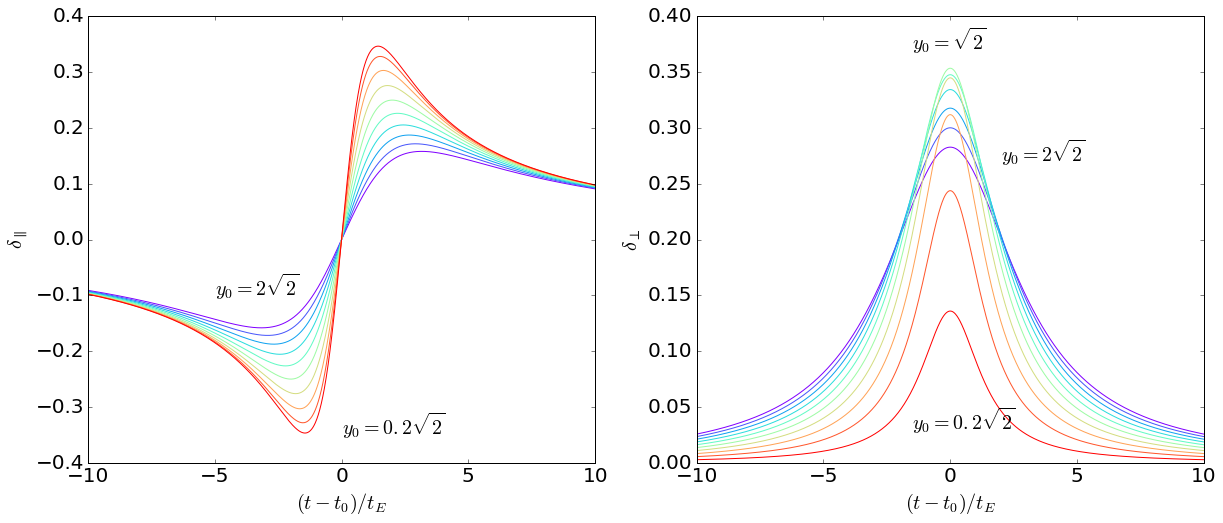

In [1]:
%matplotlib inline
from matplotlib.pyplot import cm 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker

t=np.linspace(0,1830,6400)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=np.linspace(1.0,0.1,10)*2.0*np.sqrt(2.0)
t0=965.0 # days

def tterm(M,DL,DS,v,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return ((t-t0)/tE)

def shift_par(M,DL,DS,v,y0,t0,t):
    tt=tterm(M,DL,DS,v,t0,t)
    yy=np.sqrt(y0**2+tt**2)
    return(tt/(yy**2+2))

def shift_per(M,DL,DS,v,y0,t0,t):
    tt=tterm(M,DL,DS,v,t0,t)
    yy=np.sqrt(y0**2+tt**2)
    return(y0/(yy**2+2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)

fig,ax=plt.subplots(1,2,figsize=(20,8))


color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

tt=tterm(M_lens,DL,DS,vel,t0,t)

for i in range(y0.size):
    c=next(color)
    sx=shift_par(M_lens,DL,DS,vel,y0[i],t0,t)
    sy=shift_per(M_lens,DL,DS,vel,y0[i],t0,t)
    ax[0].plot(tt,sx,'-',c=c)
    ax[1].plot(tt,sy,'-',c=c)

    
ax[0].set_xlim([-10,10])
ax[1].set_xlim([-10,10])
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

ax[0].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[1].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[0].set_ylabel('$\delta_{\parallel}$',fontsize=20)
ax[1].set_ylabel('$\delta_{\perp}$',fontsize=20)

ax[0].text(0, -0.35, r'$y_0=0.2\sqrt{2}$', fontsize=20)
ax[0].text(-5, -0.1, r'$y_0=2\sqrt{2}$', fontsize=20)
ax[1].text(-1.5, 0.37, r'$y_0=\sqrt{2}$', fontsize=20)
ax[1].text(-1.5, 0.03, r'$y_0=0.2\sqrt{2}$', fontsize=20)
ax[1].text(2, 0.27, r'$y_0=2\sqrt{2}$', fontsize=20)

The total amplitude of the shift is 

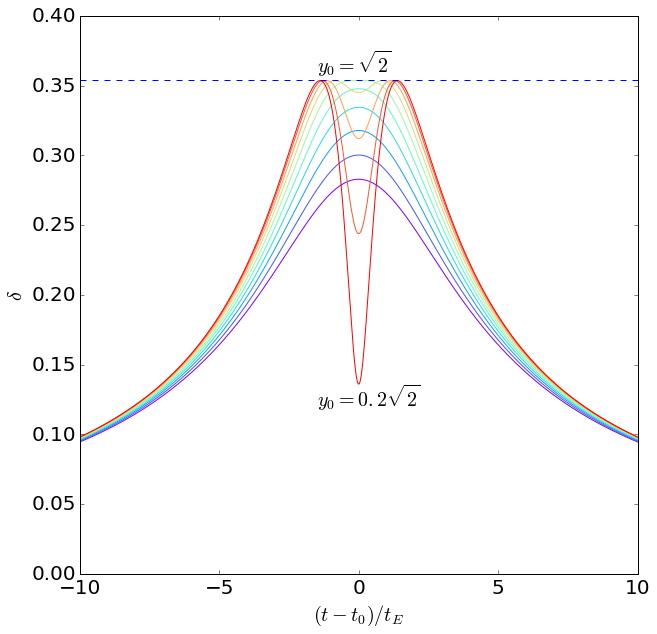

In [2]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for i in range(y0.size):
    c=next(color)
    sx=shift_par(M_lens,DL,DS,vel,y0[i],t0,t)
    sy=shift_per(M_lens,DL,DS,vel,y0[i],t0,t)    
    ax.plot(tt,np.sqrt(sx**2+sy**2),'-',c=c)

    
ax.set_xlim([-10,10])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax.set_ylabel('$\delta$',fontsize=20)

xx=[-10,10]
yy=[0.354,0.354]
ax.plot(xx,yy,'--')

ax.text(-1.5, 0.36, r'$y_0=\sqrt{2}$', fontsize=20)
ax.text(-1.5, 0.12, r'$y_0=0.2\sqrt{2}$', fontsize=20)

Thus, the maximum shift is $0.354\theta_E$ for $y_0=\sqrt{2}$. This is of order $100 \mu as$, which will be reachable soon by the *Gaia* satellite.

We can now proceed to recover the trajectory of the center of light:

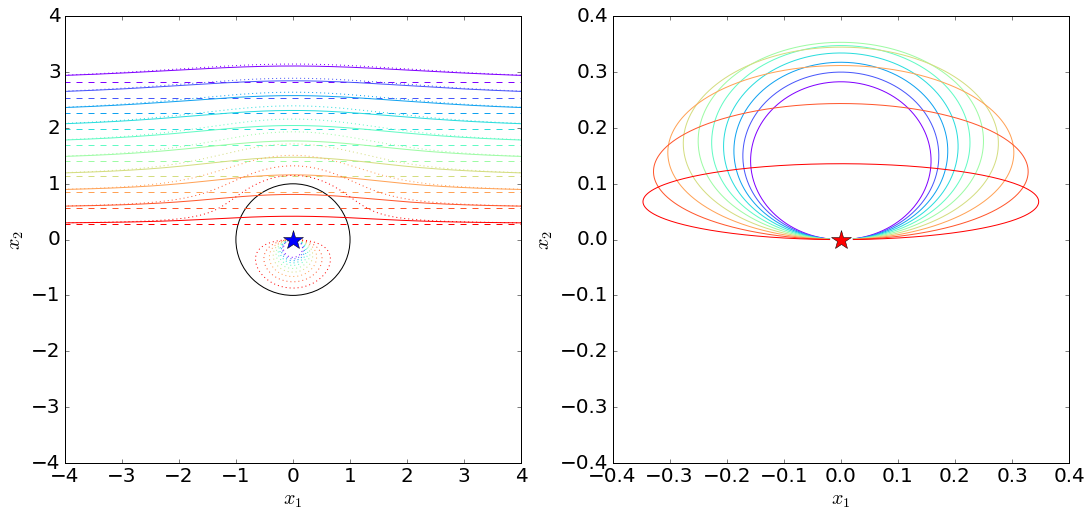

In [3]:
from matplotlib.pyplot import cm 
import matplotlib as mpl

def xp(y):
    yy=np.sqrt(y[0]**2+y[1]**2)
    return ([0.5*(yy+np.sqrt(yy**2+4))*y[0]/yy,0.5*(yy+np.sqrt(yy**2+4))*y[1]/yy])

def xm(y):
    yy=np.sqrt(y[0]**2+y[1]**2)
    return ([0.5*(yy-np.sqrt(yy**2+4))*y[0]/yy,0.5*(yy-np.sqrt(yy**2+4))*y[1]/yy])

def deltax(y):
    yy=np.sqrt(y[0]**2+y[1]**2)
    return ([y[0]/(yy**2+2),y[1]/(yy**2+2)]) 

def mup(y):
    yy=np.sqrt(y[0]**2+y[1]**2)
    return (0.5*(1+(yy**2+2)/yy/np.sqrt(yy**2+4)))

def mum(y):
    yy=np.sqrt(y[0]**2+y[1]**2)
    return (0.5*(1-(yy**2+2)/yy/np.sqrt(yy**2+4)))

def mu(y):
    yy=np.sqrt(y[0]**2+y[1]**2)
    return((yy**2+2)/yy/np.sqrt(yy**2+4))

def col(y1,y2,mu1,mu2):
    return ([(mu1*y1[0]+mu2*y2[0])/(mu1+mu2),(mu1*y1[1]+mu2*y2[1])/(mu1+mu2)])
    
def tterm(M,DL,DS,v,y0,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return ((t-t0)/tE)    

t=np.linspace(-600,1230,6400)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=np.linspace(1.0,0.1,10)*2.0*np.sqrt(2.0)
t0=365.0 # days

fig,ax=plt.subplots(1,2,figsize=(18,8))

color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for j in range(y0.size):
    
    c=next(color)

    y1=tterm(M_lens,DL,DS,vel,y0[j],t0,t)

    xx1=[]
    xx2=[]
    xx0=[]
    yy0=[]
    yy1=[]
    yy2=[]
    xxc=[]
    yyc=[]
    xxs=[]
    yys=[]


    for i in range(y1.size):
        y=[y1[i],y0[j]]
        a1=xp(y)
        a2=xm(y)
        mu1=mup(y)
        mu2=-mum(y)
        
        a3=col(a1,a2,mu1,mu2)
        
    
        xx1.append(a1[0])
        yy1.append(a1[1])
    
        xx2.append(a2[0])
        yy2.append(a2[1])
    
        xx0.append(y1[i])
        yy0.append(y0[j])  
        
        xxc.append(a3[0])
        yyc.append(a3[1])
        
        a4=deltax(y)
        xxs.append(a4[0])
        yys.append(a4[1])
    
    ax[0].plot(xx0,yy0,'--',c=c)
    ax[0].plot(xx1,yy1,':',c=c)
    ax[0].plot(xx2,yy2,':',c=c)
    ax[0].plot(xxc,yyc,'-',c=c)
    #ax[1].plot(xxs,yys,'-',c=c)
    ax[1].plot(xxs,yys,'-',c=c,label=str(y0[j]))

ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])

ax[1].set_xlim([-0.4,0.4])
ax[1].set_ylim([-0.4,0.4])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

circle=plt.Circle((0,0),1,color='black',fill=False)
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20,color='blue')
ax[1].plot([0.0],[0.0],'*',markersize=20,color='red')


ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)

# Optical depth

In order to produce a centroid shift $\delta>\delta_T$, the source has to stay within a certain distance from the lens:

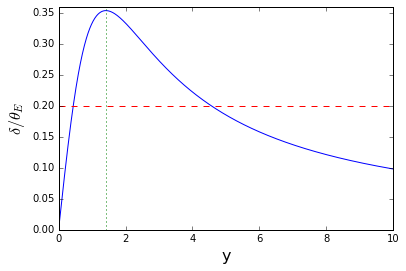

In [4]:
def delta(y):
    return (y/(y**2+2))

y=np.linspace(0,10,1000)
d=delta(y)

plt.plot(y,d)

x1=[np.sqrt(2),np.sqrt(2)]
x2=[0,10]
plt.plot(x1,x2,":")
plt.ylim([0,0.36])

x1=[0,10]
dt=[0.2,0.2]
plt.plot(x1,dt,"--")

plt.xlabel('y',fontsize=16)
plt.ylabel(r'$\delta/\theta_E$',fontsize=16)

The cross section for astrometric microlensing is then

$$
\sigma=\pi(y_{T,+}^2-y_{T,-}^2)\theta_E^2
$$